# time Module

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

import mglearn
#import t_Mod
from t_Mod import *
#from t_Mod.plots_t import *

In [2]:
df = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "constant(del).csv") )
#df2 = pd.read_csv(
#    os.path.join(mglearn.datasets.DATA_PATH, "constant(val).csv") )
# 예제를 위해 몇개의 열만 선택합니다
#df = df[['IR', 'FlowHt', 'Const', 'Var', 'Base', 'MixS75','MixS50','MixS25']]
#df = df[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
df = df[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
#df2 = df2[['IR', 'FlowHt', 'Sand','Ash']]
df['delIF'] = df['delFlow']/df['delIR']*-1

df['delIF']=df['delIF'].replace(np.nan, 0)
df = df[['IR', 'FlowHt', 'Sand','Ash' ]]

display(df.head())
#display(df2.head())

,IR,FlowHt,Sand,Ash
0,1.0000,0.0000,1.0,0.0
1,0.9995,0.1798,1.0,0.0
2,0.9985,0.5389,1.0,0.0
3,0.9970,1.0757,1.0,0.0
4,0.9950,1.7884,1.0,0.0


In [3]:
df.describe()
print(df[58:116])


         IR   FlowHt  Sand   Ash
58   1.0000   0.0000  0.75  0.25
59   0.9995   2.8114  0.75  0.25
60   0.9985   4.2143  0.75  0.25
61   0.9970   5.5000  0.75  0.25
62   0.9950   5.8750  0.75  0.25
63   0.9925   6.2500  0.75  0.25
64   0.9895   6.6250  0.75  0.25
65   0.9860   7.0000  0.75  0.25
66   0.9820   7.4333  0.75  0.25
67   0.9775   7.8667  0.75  0.25
68   0.9725   8.3000  0.75  0.25
69   0.9670   8.7333  0.75  0.25
70   0.9610   9.1667  0.75  0.25
71   0.9545   9.6000  0.75  0.25
72   0.9475   9.9667  0.75  0.25
73   0.9400  10.3333  0.75  0.25
74   0.9320  10.7000  0.75  0.25
75   0.9235  11.0400  0.75  0.25
76   0.9145  11.3800  0.75  0.25
77   0.9050  11.7200  0.75  0.25
78   0.8950  12.0600  0.75  0.25
79   0.8845  12.4000  0.75  0.25
80   0.8735  12.7300  0.75  0.25
81   0.8620  13.0600  0.75  0.25
82   0.8500  13.3900  0.75  0.25
83   0.8375  13.7200  0.75  0.25
84   0.8245  14.0500  0.75  0.25
85   0.8110  14.3125  0.75  0.25
86   0.7970  14.5750  0.75  0.25
87   0.782

(1.041325, 0.0)

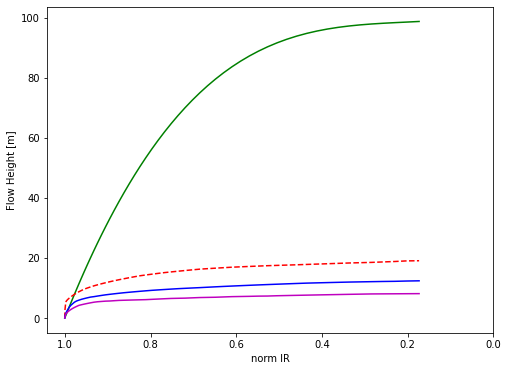

In [4]:

plt.plot(df.iloc[0:58,0], df.iloc[0:58,1], 'g-'
         , df.iloc[58:116,0], df.iloc[58:116,1],'r--'
         ,df.iloc[116:174,0], df.iloc[116:174,1],'b-'
         ,df.iloc[174:232,0], df.iloc[174:232,1], 'm-')
plt.xlabel('norm IR')
plt.ylabel('Flow Height [m]')
#plt.axis('equal')
#plt.axis('square')
plt.xlim([plt.xlim()[1], 0])
#plt.ylim([0,plt.ylim()[1]])
#_ = plt.plot([-100, 100], [-100, 100])


In [5]:
# ## 데이터 정규화

num_features = df.shape[1]
num_features

4

In [6]:
#df['FlowHt']=(df['FlowHt']-df['FlowHt'].mean())/df['FlowHt'].std()


df.describe()

,IR,FlowHt,Sand,Ash
count,464.000000,464.000000,464.000000,464.000000
mean,0.719750,67.906908,0.562500,0.437500
std,0.250962,69.797134,0.292666,0.292666
min,0.173500,0.000000,0.100000,0.000000
25%,0.527000,8.970000,0.362500,0.212500
50%,0.789750,35.950800,0.550000,0.450000
75%,0.947500,115.250000,0.787500,0.637500
max,1.000000,231.000000,1.000000,0.900000


,IR,FlowHt,Sand,Ash
count,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02
mean,8.958351e-16,1.225074e-16,1.025999e-15,-4.594026e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.176627e+00,-9.729183e-01,-1.580300e+00,-1.494878e+00
25%,-7.680453e-01,-8.444030e-01,-6.833730e-01,-7.687946e-01
50%,2.789270e-01,-4.578427e-01,-4.271081e-02,4.271081e-02
75%,9.075088e-01,6.782956e-01,7.687946e-01,6.833730e-01
max,1.116704e+00,2.336673e+00,1.494878e+00,1.580300e+00


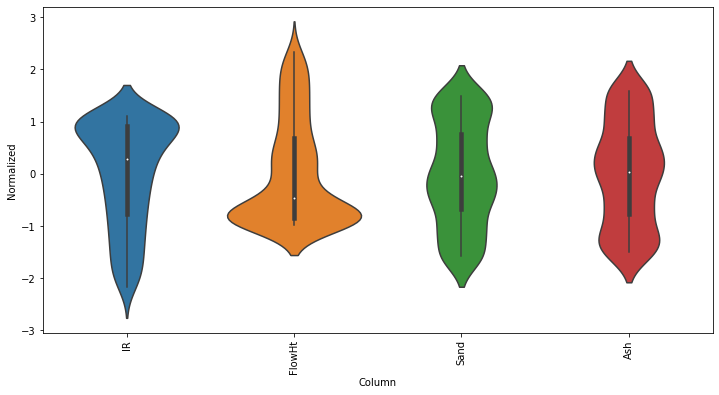

In [7]:
df_mean = df.mean()
df_std = df.std()
df_std_s = (df - df_mean) / df_std
df_std_m = df_std_s.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std_m)
_ = ax.set_xticklabels(df.keys(), rotation=90)
df_std_s.describe()

In [8]:
# data
df_org = df
df = df_std_s

column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)*0.5

curve_0 = df[0:int(n*0.25)].copy()
curve_1 = df[int(n*0.25):int(n*0.5)].copy()
curve_2 = df[int(n*0.5):int(n*0.75)].copy()
curve_3 = df[int(n*0.75):int(n)].copy()
curve_4 = df[int(n):].copy()
#train_df_s = train_df_s.reset_index(drop=True)

In [9]:
df.describe()
#print(df[58:116])

,IR,FlowHt,Sand,Ash
count,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02
mean,8.958351e-16,1.225074e-16,1.025999e-15,-4.594026e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.176627e+00,-9.729183e-01,-1.580300e+00,-1.494878e+00
25%,-7.680453e-01,-8.444030e-01,-6.833730e-01,-7.687946e-01
50%,2.789270e-01,-4.578427e-01,-4.271081e-02,4.271081e-02
75%,9.075088e-01,6.782956e-01,7.687946e-01,6.833730e-01
max,1.116704e+00,2.336673e+00,1.494878e+00,1.580300e+00


Text(0, 0.5, 'Flow Height [m]')

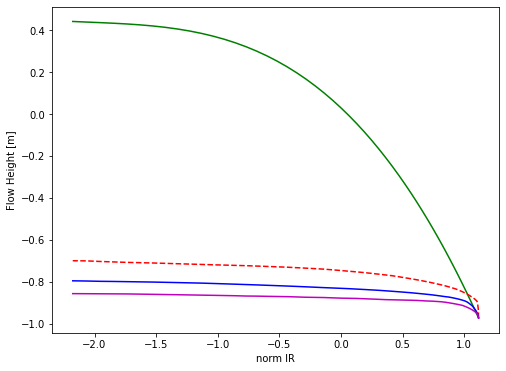

In [10]:

plt.plot(df.iloc[0:58,0], df.iloc[0:58,1], 'g-'
         , df.iloc[58:116,0], df.iloc[58:116,1],'r--'
         ,df.iloc[116:174,0], df.iloc[116:174,1],'b-'
         ,df.iloc[174:232,0], df.iloc[174:232,1], 'm-')
plt.xlabel('norm IR')
plt.ylabel('Flow Height [m]')
#plt.axis('equal')
#plt.axis('square')
#plt.xlim([plt.xlim()[1], -2.5])
#plt.ylim([0,plt.ylim()[1]])
#_ = plt.plot([-100, 100], [-100, 100])



### curve_0

In [11]:
crv_0 = curve_0.copy()
crv_0 = crv_0.reset_index(drop=True)

In [12]:
#m1 = int(n*0.2)
m1 = int(len(curve_0))
for i in range(1, 4):
    m = m1*0.33334*i
    train_df_0 = crv_0[0:int(m*0.8)]
    val_df_0 = crv_0[int(m*0.8):int(m)]
#    test_df_0 = crv_0[int(m*0.8):int(m)]
#    test_df_0 = crv_0[int(n*0.25*0.2*i-3):int(n*0.25*0.2*(i+1))]
    exec(f'train_df_0{i-1} = train_df_0')
    exec(f'val_df_0{i-1} = val_df_0')
#    exec(f'test_df_0{i-1} = test_df_0')


In [13]:
#train_total = {0: train_df_00 , 1: train_df_01, 2: train_df_02, 3: train_df_03}
#val_total = {0: val_df_00 , 1: val_df_01, 2: val_df_02, 3: val_df_03}
#test_total = {0: test_df_00 , 1: test_df_01, 2: test_df_02, 3: test_df_03}

train_total = [train_df_00, train_df_01, train_df_02]
val_total = [val_df_00, val_df_01, val_df_02]
#test_total = [test_df_00, test_df_01, test_df_02]

#ttt = { 'tr' : train_total, 'va' : val_total, 'te' : test_total}
ttt = { 'tr' : train_total, 'va' : val_total, 'te' : val_total}
ttt = pd.DataFrame(ttt)
print(ttt.columns)
print(ttt.index)

Index(['tr', 'va', 'te'], dtype='object')
RangeIndex(start=0, stop=3, step=1)


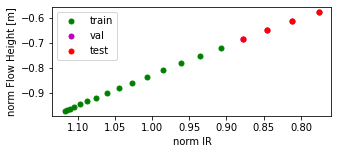

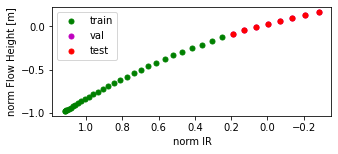

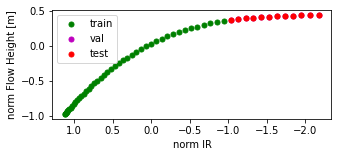

In [14]:
#from t_Mod.plots_t import plot_curve, eval, add_curve # absolute path, import 함수

for i in range(0, 3) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt.iloc[i]['tr']
        va = ttt.iloc[i]['va']
        te = ttt.iloc[i]['te']
#        plot_curve(tr, va, te)
        plots_t.plot_curve(tr, va, te)
#        t_Mod.plots_t.plot_curve(tr, va, te)


### curve_1

In [15]:
crv_1 = curve_1.copy()
#crv_1 = crv_1.reset_index(drop=True)

In [16]:
m1 = int(len(curve_1))
for i in range(1, 4):
    m = m1*0.33334*i
    train_df_1 = crv_1[0:int(m*0.8)]
    val_df_1 = crv_1[int(m*0.8):int(m)]
    exec(f'train_df_1{i-1} = train_df_1')
    exec(f'val_df_1{i-1} = val_df_1')

In [17]:
train_t_1 = {0: train_df_10 , 1: train_df_11, 2: train_df_12 }
val_t_1 = {0: val_df_10 , 1: val_df_11, 2: val_df_12 }
#test_t_1 = {0: test_df_10 , 1: test_df_11, 2: test_df_12 }

ttt_1 = { 'tr' : train_t_1, 'va' : val_t_1, 'te' : val_t_1}
ttt_1 = pd.DataFrame(ttt_1)

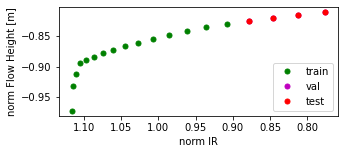

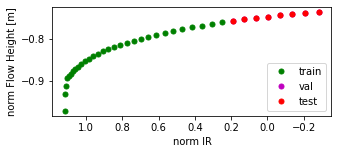

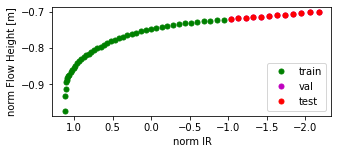

In [18]:
for i in range(0, 3) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt_1.iloc[i]['tr']
        va = ttt_1.iloc[i]['va']
        te = ttt_1.iloc[i]['te']
        plots_t.plot_curve(tr, va, te)

### curve_2

In [19]:
crv_2 = curve_2.copy()
#crv_2 = crv_2.reset_index(drop=True)

In [20]:
m1 = int(len(curve_2))
for i in range(1, 4):
    m = m1*0.33334*i
    train_df_2 = crv_2[0:int(m*0.8)]
    val_df_2 = crv_2[int(m*0.8):int(m)]
    exec(f'train_df_2{i-1} = train_df_2')
    exec(f'val_df_2{i-1} = val_df_2')

In [21]:
train_t_2 = {0: train_df_20 , 1: train_df_21, 2: train_df_22 }
val_t_2 = {0: val_df_20 , 1: val_df_21, 2: val_df_22 }
#test_t_1 = {0: test_df_10 , 1: test_df_11, 2: test_df_12 }

ttt_2 = { 'tr' : train_t_2, 'va' : val_t_2, 'te' : val_t_2}
ttt_2 = pd.DataFrame(ttt_2)

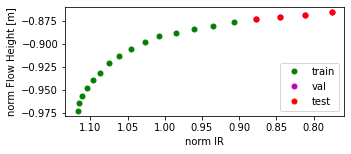

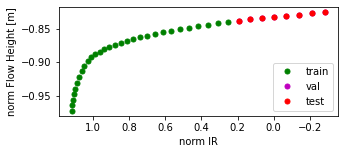

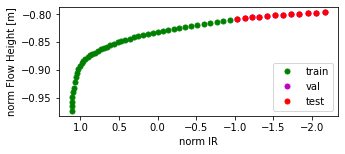

In [22]:
for i in range(0, 3) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt_2.iloc[i]['tr']
        va = ttt_2.iloc[i]['va']
        te = ttt_2.iloc[i]['te']
        plots_t.plot_curve(tr, va, te)

### curve_3

In [23]:
crv_3 = curve_3.copy()
#crv_2 = crv_2.reset_index(drop=True)

In [24]:
m1 = int(len(curve_3))
for i in range(1, 4):
    m = m1*0.33334*i
    train_df_3 = crv_3[0:int(m*0.8)]
    val_df_3 = crv_3[int(m*0.8):int(m)]
    exec(f'train_df_3{i-1} = train_df_3')
    exec(f'val_df_3{i-1} = val_df_3')

In [25]:
train_t_3 = {0: train_df_30 , 1: train_df_31, 2: train_df_32 }
val_t_3 = {0: val_df_30 , 1: val_df_31, 2: val_df_32 }
#test_t_1 = {0: test_df_10 , 1: test_df_11, 2: test_df_12 }

ttt_3 = { 'tr' : train_t_3, 'va' : val_t_3, 'te' : val_t_3}
ttt_3 = pd.DataFrame(ttt_3)

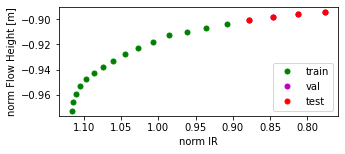

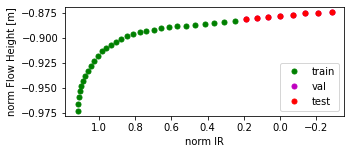

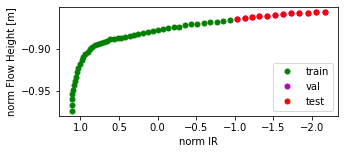

In [26]:
for i in range(0, 3) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt_3.iloc[i]['tr']
        va = ttt_3.iloc[i]['va']
        te = ttt_3.iloc[i]['te']
        plots_t.plot_curve(tr, va, te)


#### WindowGrerator Class
#### WinGen()

In [27]:
# WindowGen needs train_df
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
train_df = train_df_01.copy()
val_df = val_df_01.copy()
test_df = val_df_01.copy()


In [28]:
single_step_window = Class_t.WindowGenerator(
    input_width=1, label_width=1, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['FlowHt']

In [29]:
single_step_window_t = Class_t.WinGen(
    input_width=1, label_width=1, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])
single_step_window_t


Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['FlowHt']

In [30]:
CONV_WIDTH = 3
conv_window = Class_t.WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
        train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

conv_window

conv_window_t = Class_t.WinGen(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
        train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

conv_window_t

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['FlowHt']

In [31]:
wide_window = Class_t.WindowGenerator(
    input_width=8, label_width=8, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_window
#print(wide_window)
wide_window_t = Class_t.WinGen(
    input_width=8, label_width=8, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_window_t

Total window size: 9
Input indices: [0 1 2 3 4 5 6 7]
Label indices: [1 2 3 4 5 6 7 8]
Label column name(s): ['FlowHt']

In [32]:
LABEL_WIDTH = 8
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = Class_t.WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv_window

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 3  4  5  6  7  8  9 10]
Label column name(s): ['FlowHt']

In [33]:
wide_conv_window_t = Class_t.WinGen(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv_window_t

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 3  4  5  6  7  8  9 10]
Label column name(s): ['FlowHt']

### Convolution Model

In [34]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [35]:

_ = compile.compile_2(conv_model)

In [36]:
tr_loss_con = []
va_loss_con= []
tr_mae_con = []
va_mae_con = []

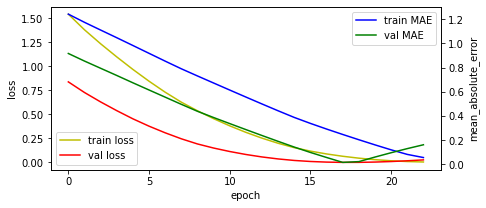

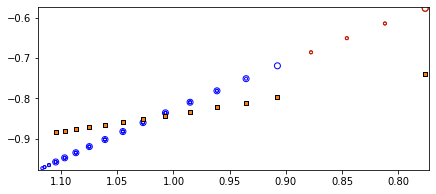

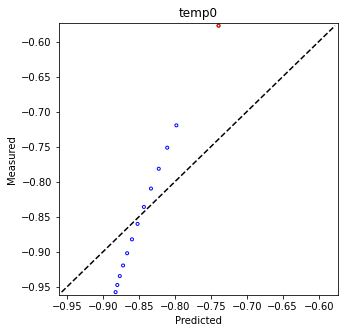

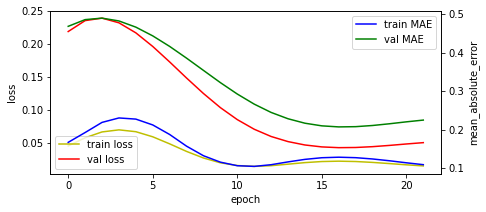

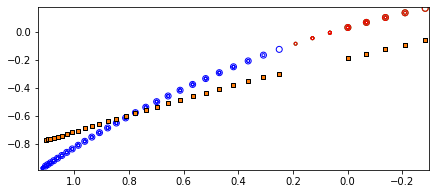

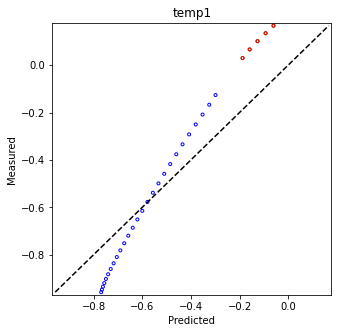

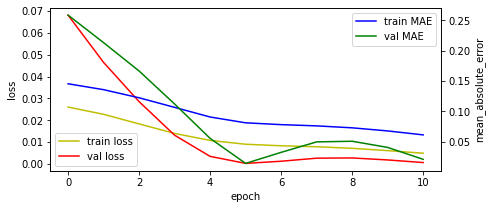

End of curve0 -----------------


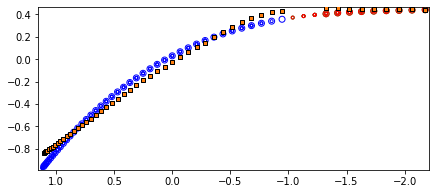

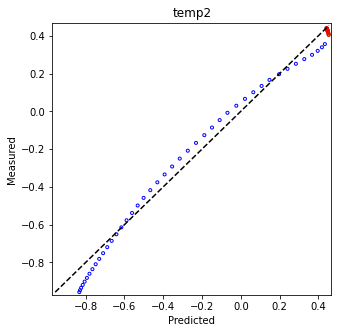

In [37]:
train_loss_con, val_loss_con, train_mae_con, val_mae_con =  \
    plots_t.add_curve(curve=ttt, window=conv_window,
            window_t=conv_window_t, model=conv_model, npat= 5,
                      num_epoch=100, add_num=0, df_name='temp')
        #     window_t=conv_window_t, model=conv_model, npat= 10, num_epoch=100 )
tr_loss_con = tr_loss_con + train_loss_con
va_loss_con = va_loss_con + val_loss_con
tr_mae_con = tr_mae_con + train_mae_con
va_mae_con = va_mae_con + val_mae_con

print(f'End of curve0 -----------------')


In [38]:
#conv_window_t.plot_batch(conv_model, dset_name='train', n_batch=10, figures=0)
#conv_window_t.plot_batch(conv_model, 'train', n_batch=1, figures='True', xy_fig='True')
#conv_window_t.plot_batch(conv_model, 'val', n_batch=10,   xy_fig='True')
#conv_window_t.plot_batch(conv_model, 'train', n_batch=2 )

In [39]:
#conv_window_t.plot_xy(conv_model,  n_batch=10 )
#plt.gca().set_title('Curve 0')

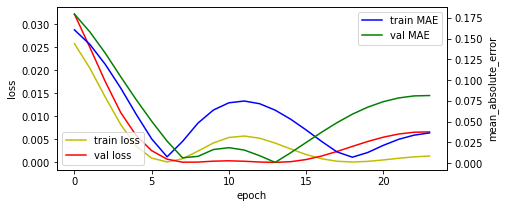

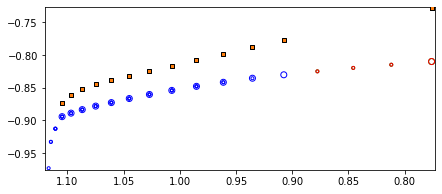

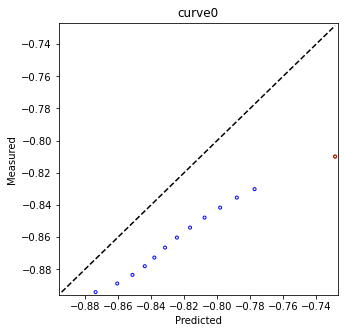

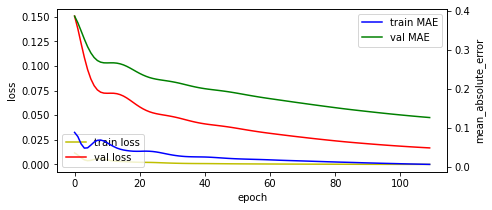

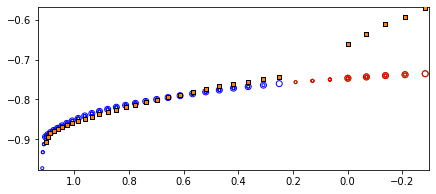

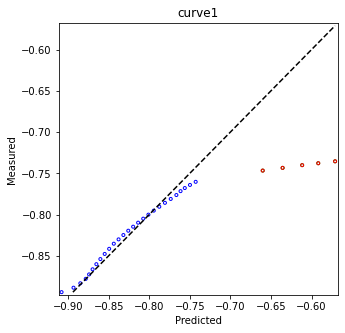

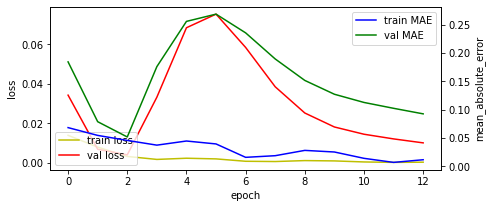

End of curve1 -----------------


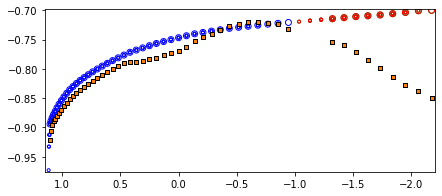

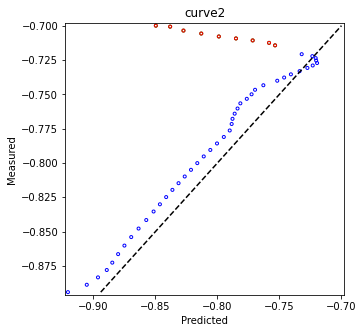

In [40]:
train_loss_con, val_loss_con, train_mae_con, val_mae_con =  \
    plots_t.add_curve(curve=ttt_1, window=conv_window,
          window_t=conv_window_t, model=conv_model, npat= 10, num_epoch=100, add_num=0, df_name='curve')
tr_loss_con = tr_loss_con + train_loss_con
va_loss_con = va_loss_con + val_loss_con
tr_mae_con = tr_mae_con + train_mae_con
va_mae_con = va_mae_con + val_mae_con

print(f'End of curve1 -----------------')

In [41]:
conv_window_t.train_df = train_df_02
dataset = conv_window.train
n = 1
for batch in dataset :
  inputs, targets = batch
  print(f'Inputs shape (batch, time, features): {inputs.shape}')
  print(f'Labels shape (batch, time, features): {targets.shape}')
  #plot_3(inputs, targets, 8, n)
  n += 1

Inputs shape (batch, time, features): (16, 3, 4)
Labels shape (batch, time, features): (16, 1, 1)
Inputs shape (batch, time, features): (16, 3, 4)
Labels shape (batch, time, features): (16, 1, 1)
Inputs shape (batch, time, features): (11, 3, 4)
Labels shape (batch, time, features): (11, 1, 1)


Text(0.5, 1.0, 'Curve 1')

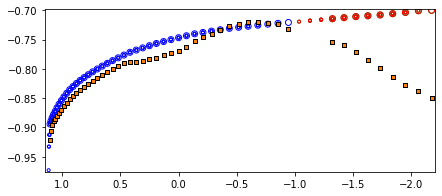

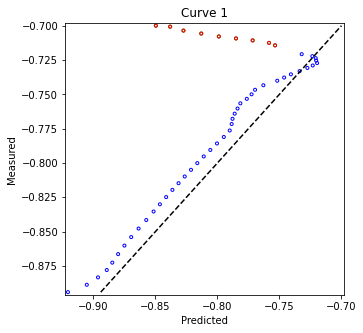

In [42]:
conv_window_t.train_df = train_df_12

conv_window_t.plot_xy(conv_model,  n_batch=10 )
plt.gca().set_title('Curve 1')

In [43]:
'''
train_loss_con, val_loss_con, train_mae_con, val_mae_con =  \
    plots_t.add_curve(curve=ttt_2, window=conv_window,
        window_t=conv_window_t, model=conv_model, npat= 10, num_epoch=200, add_num=0, df_name='temp')
tr_loss_con = tr_loss_con + train_loss_con
va_loss_con = va_loss_con + val_loss_con
tr_mae_con = tr_mae_con + train_mae_con
va_mae_con = va_mae_con + val_mae_con

print(f'End of curve2 -----------------')

'''

"\ntrain_loss_con, val_loss_con, train_mae_con, val_mae_con =      plots_t.add_curve(curve=ttt_2, window=conv_window,\n        window_t=conv_window_t, model=conv_model, npat= 10, num_epoch=200, add_num=0, df_name='temp')\ntr_loss_con = tr_loss_con + train_loss_con\nva_loss_con = va_loss_con + val_loss_con\ntr_mae_con = tr_mae_con + train_mae_con\nva_mae_con = va_mae_con + val_mae_con\n\nprint(f'End of curve2 -----------------')\n\n"

In [44]:
'''
#conv_window_t.train_df = ttt_2.iloc[3]['tr']
conv_window_t.plot_xy(conv_model,  n_batch=10 )
plt.gca().set_title('Curve 2')

'''








"\n#conv_window_t.train_df = ttt_2.iloc[3]['tr']\nconv_window_t.plot_xy(conv_model,  n_batch=10 )\nplt.gca().set_title('Curve 2')\n\n"

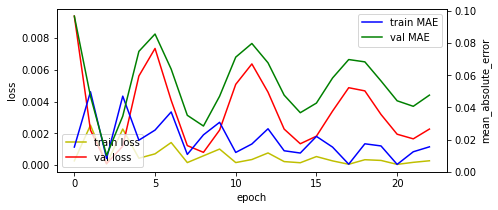

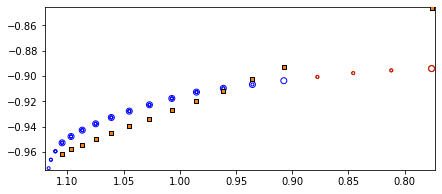

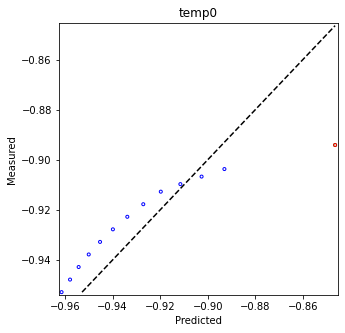

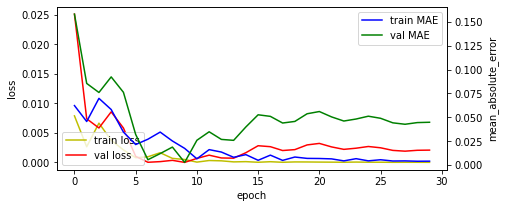

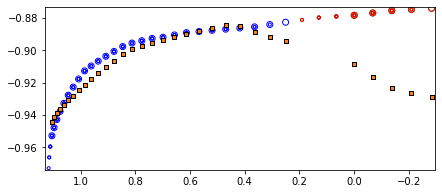

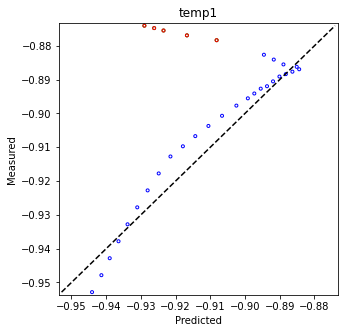

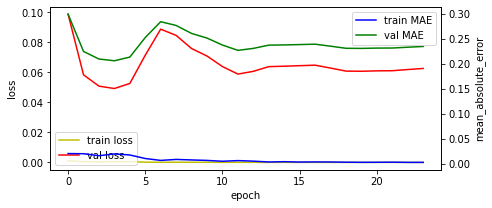

End of curve3 -----------------


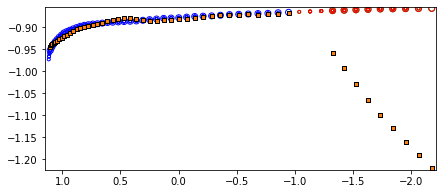

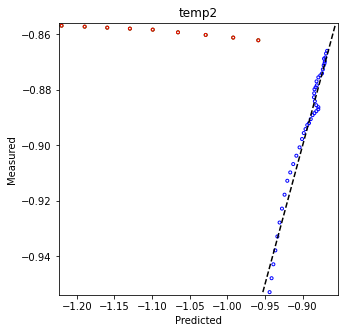

In [45]:
train_loss_con, val_loss_con, train_mae_con, val_mae_con =  \
    plots_t.add_curve(curve=ttt_3, window=conv_window,
                                window_t=conv_window_t, model=conv_model, npat= 20,
                      num_epoch=100, add_num=0 , df_name='temp')
tr_loss_con = tr_loss_con + train_loss_con
va_loss_con = va_loss_con + val_loss_con
tr_mae_con = tr_mae_con + train_mae_con
va_mae_con = va_mae_con + val_mae_con

print(f'End of curve3 -----------------')

Text(0.5, 1.0, 'Curve 3')

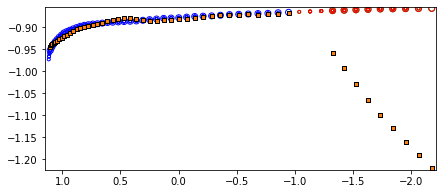

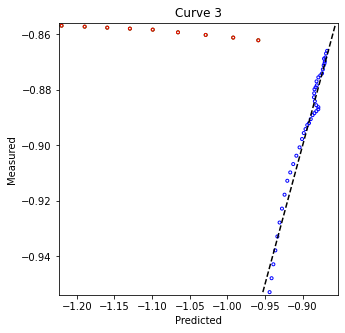

In [46]:
conv_window_t.plot_xy(conv_model,  n_batch=10 )
plt.gca().set_title('Curve 3')




Text(0.5, 1.0, 'Test Curve')

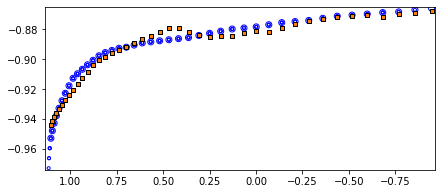

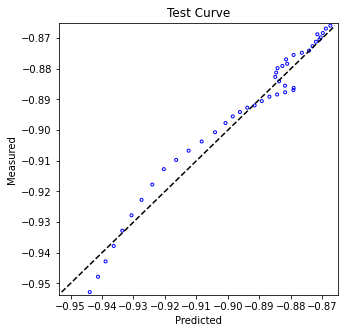

In [47]:
# set curve3 to the test data set
conv_window_t.train_df = train_df_32
conv_window_t.val_df = train_df_32
conv_window_t.test_df = train_df_32

conv_window_t.plot_xy(conv_model,  n_batch=10, dset_name='train' )
plt.gca().set_title('Test Curve')















In [48]:
tr_loss_con_avg = np.mean(train_loss_con)
va_loss_con_avg = np.mean(val_loss_con)
tr_mae_con_avg = np.mean(train_mae_con)
va_mae_con_avg = np.mean(val_mae_con)

#val_performance['linear'] = lstm_model.evaluate(single_step_window.val)
#performance['linear'] = lstm_model.evaluate(single_step_window.test, verbose=0)

In [49]:
tr_perform = {}
va_perform = {}
te_perform = {}

tr_perform['conve']= [tr_loss_con_avg, tr_mae_con_avg]
va_perform['conve']= [va_loss_con_avg, va_mae_con_avg]

In [50]:
tr0 = ttt.iloc[2]['tr']
tr1 = tr0.append(ttt_1.iloc[2]['tr'])
tr2 = tr1.append(ttt_2.iloc[2]['tr'])
tr3 = tr2.append(ttt_3.iloc[2]['tr'])

va0 = ttt.iloc[2]['va']
va1 = va0.append(ttt_1.iloc[2]['va'])
va2 = va1.append(ttt_2.iloc[2]['va'])
va3 = va2.append(ttt_3.iloc[2]['va'])

te0 = ttt.iloc[2]['te']
te1 = te0.append(ttt_1.iloc[2]['te'])
te2 = te1.append(ttt_2.iloc[2]['te'])
te3 = te2.append(ttt_3.iloc[2]['te'])


Text(0.5, 1.0, 'All Curves')

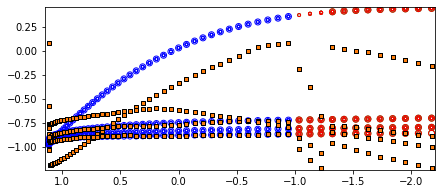

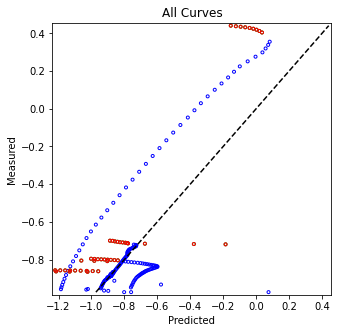

In [51]:
    conv_window_t.train_df = tr3
    conv_window_t.val_df = va3
    conv_window_t.test_df = te3

    conv_window_t.plot_xy(conv_model,  n_batch=20 )
    plt.gca().set_title('All Curves')

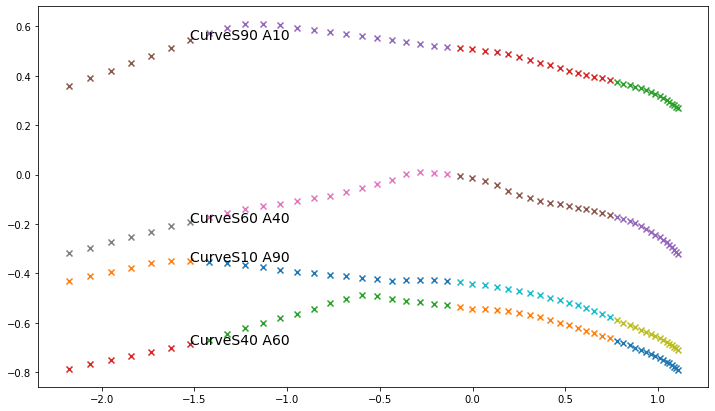

In [59]:
fig, ax2 = plt.subplots(figsize = (12,7))

# curve 4
crv_4 = curve_4.copy()
m = len(crv_4)
#train_df_4 = crv_4[0:int(m)]  #all

train_df_4 = crv_4[0:int(m*0.25)]  #40% 60%
plots_t.plot_all(train_df_4,  model=conv_model, window_t=conv_window_t, set_name='S40 A60', marker2='x', edgecolor2='r')

train_df_4 = crv_4[int(m*0.25):int(m*0.5)]   #60% 40%
plots_t.plot_all(train_df_4,  model=conv_model, window_t=conv_window_t,set_name='S60 A40')

train_df_4 = crv_4[int(m*0.5):int(m*0.75)]  #10% 90%
plots_t.plot_all(train_df_4,  model=conv_model, window_t=conv_window_t,set_name='S10 A90')

train_df_4 = crv_4[ int(m*0.75):int(m*1.00)]  #90% 10%
plots_t.plot_all(train_df_4,  model=conv_model, window_t=conv_window_t,set_name='S90 A10')

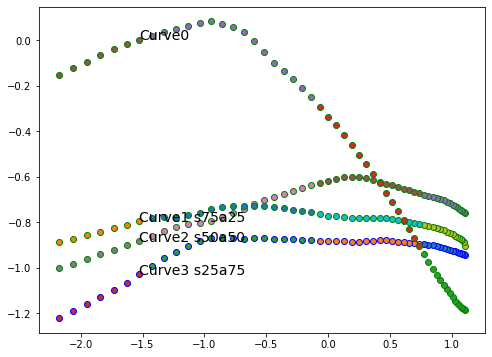

In [60]:
#------------------------------------------
train_df_3 = curve_3.copy()
plots_t.plot_all(train_df_3, set_name='3 s25a75',   model=conv_model,window_t=conv_window_t,marker2='o' , edgecolor2 ='b')

#------------------------------------------
train_df_2 = curve_2.copy()
plots_t.plot_all(train_df_2, set_name='2 s50a50',   model=conv_model,window_t=conv_window_t,marker2='o' , edgecolor2 ='g')
#------------------------------------------
train_df_1 = curve_1.copy()
plots_t.plot_all(train_df_1, set_name='1 s75a25',  model=conv_model,window_t=conv_window_t, marker2='o' , edgecolor2 ='g')

#------------------------------------------

train_df_0 = curve_0.copy()
plots_t.plot_all(train_df_0, set_name='0', marker2='o' ,model=conv_model,window_t=conv_window_t, edgecolor2 ='g')



#------------------------------------------
ax2.set_xlabel('norm IR')
ax2.set_ylabel('Flow Height [m]')
        #ax2.set_xlim([plt.xlim()[1], -2.5])
ax2.set_xlim([1., 0])
ax2.plot(curve_1.iloc[0:58,0], curve_1.iloc[0:58,1], 'g-',
        curve_2.iloc[0:58,0], curve_2.iloc[0:58,1], 'r-',
         curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b-'
          ,curve_0.iloc[0:58,0], curve_0.iloc[0:58,1], 'm-')
#------------------------------------------

In [58]:
LABEL_WIDTH = 8
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = Class_t.WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv_window

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 3  4  5  6  7  8  9 10]
Label column name(s): ['FlowHt']

In [59]:
wide_conv_window_t = Class_t.WinGen(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv_window_t

print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (16, 10, 6)
Labels shape: (16, 8, 1)
Output shape: (16, 8, 1)


In [60]:
n=1
for example_inputs, example_labels in wide_conv_window.train.take(200): #1534, 6
#for example_inputs, example_labels in single_step_window.train.take(3):
#for example_inputs, example_labels in wide_window.train.take(2000): #1533 15
  print(n)
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')
  n += 1

1
Inputs shape (batch, time, features): (16, 10, 6)
Labels shape (batch, time, features): (16, 8, 1)
2
Inputs shape (batch, time, features): (12, 10, 6)
Labels shape (batch, time, features): (12, 8, 1)


이제 더 넓은 창에 모델의 예측값을 플롯할 수 있습니다. 첫 번째 예측 전 3개의 입력 타임스텝에 주목하세요. 여기서 모든 예측은 이전 3개의 타임스텝에 기초합니다.

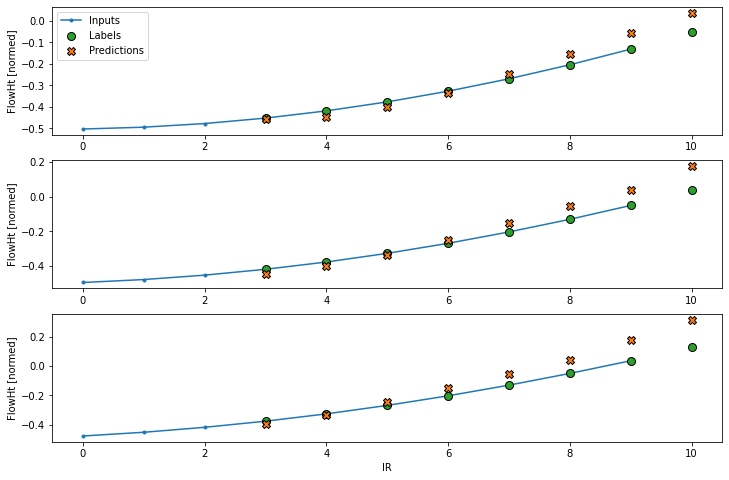

In [61]:
wide_conv_window.plot(conv_model)

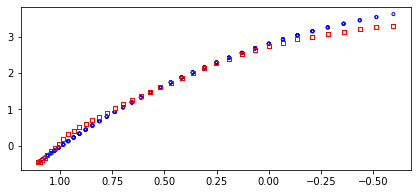

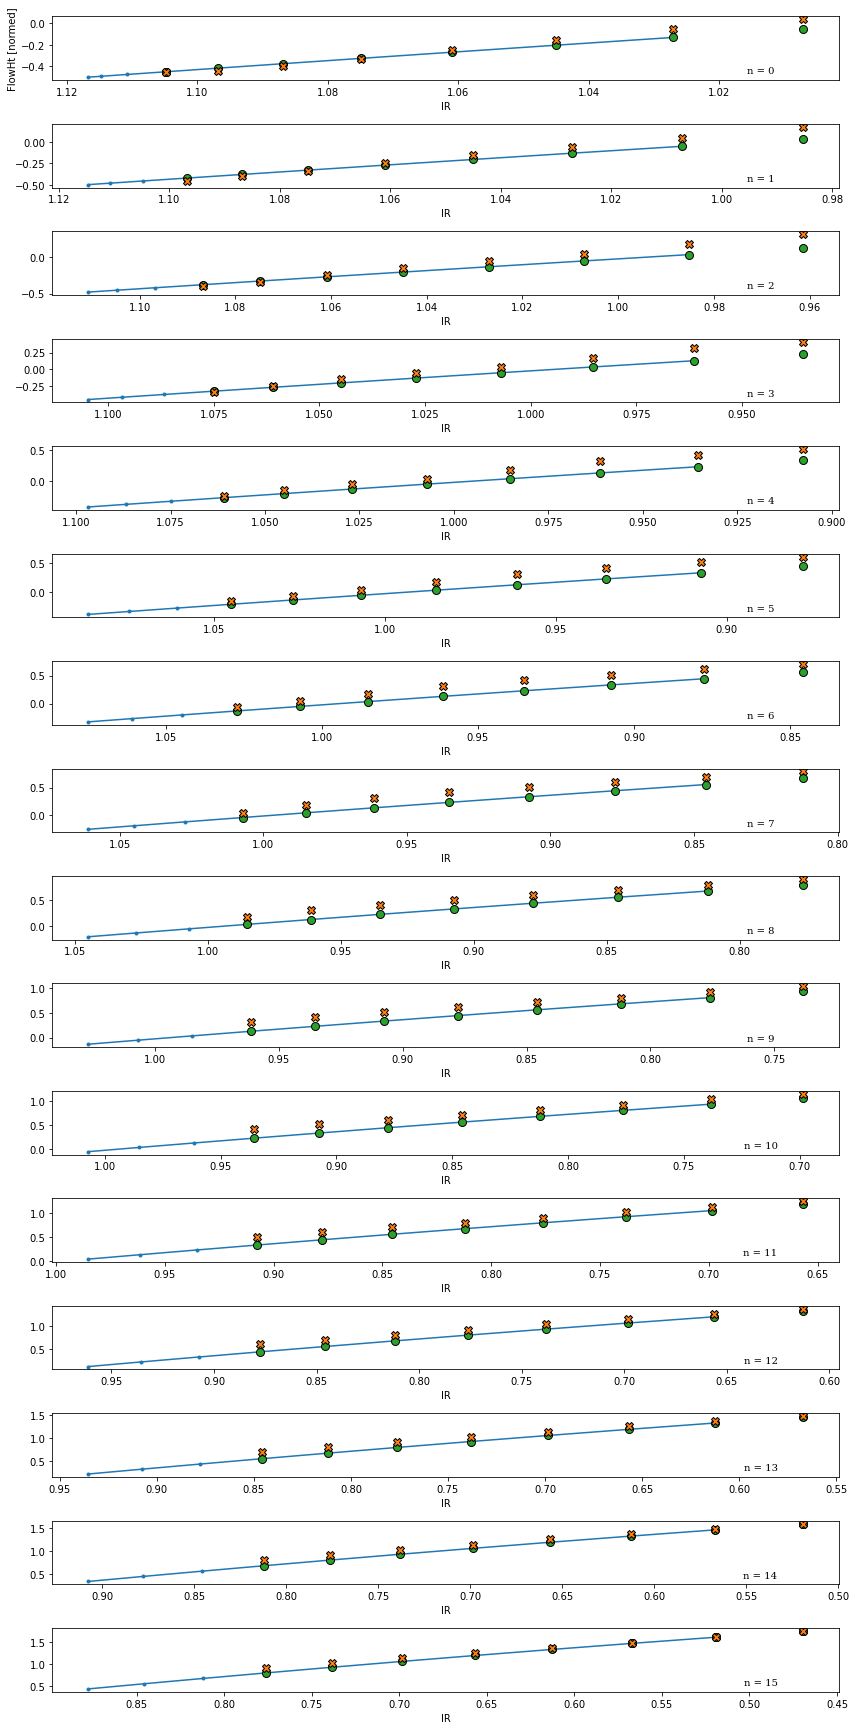

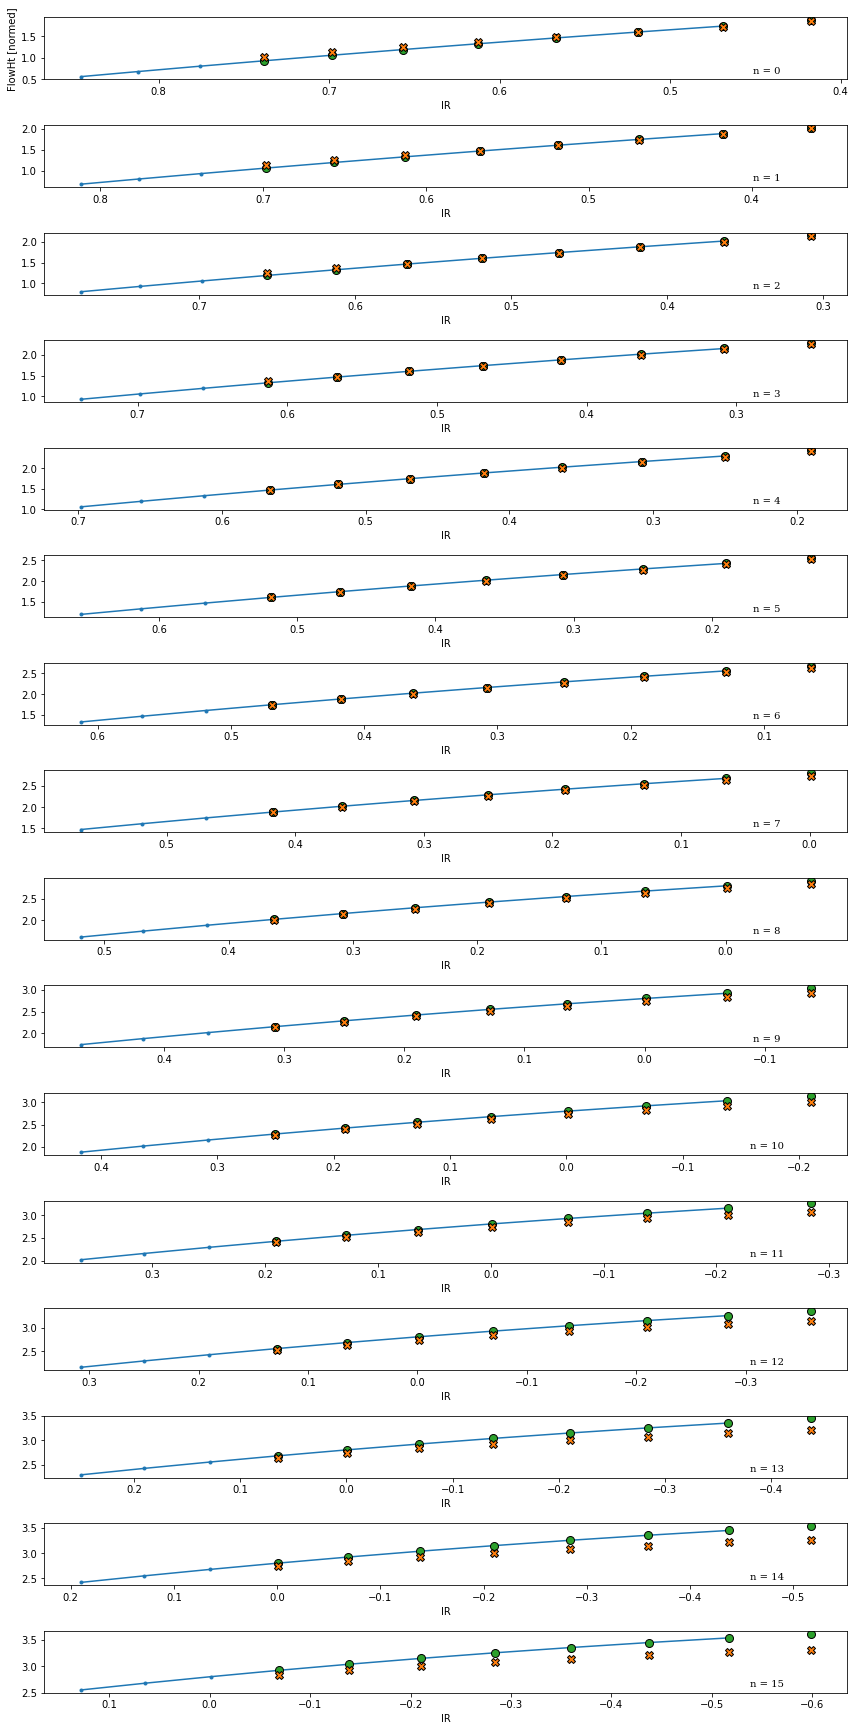

In [62]:
    wide_conv_window_t.train_df = tr3
    wide_conv_window_t.val_df = va3
    wide_conv_window_t.test_df = te3
    wide_conv_window_t.plot_batch(conv_model,n_batch = 1, figures='True')

#(self, model=None, dset_name=None, plot_col='FlowHt', max_subplots=40, n_batch=None,
#               figures=None, xy_fig=None)

Text(0.5, 1.0, 'Curve 0')

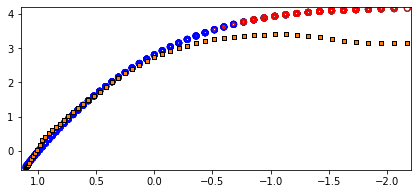

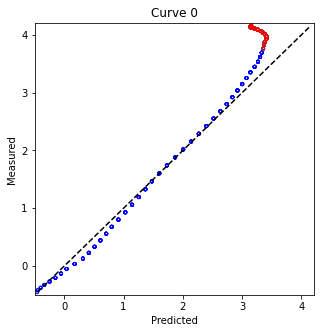

In [63]:
    wide_conv_window_t.train_df = ttt.iloc[2]['tr']
    wide_conv_window_t.val_df = ttt.iloc[2]['va']
    wide_conv_window_t.test_df = ttt.iloc[2]['te']

    wide_conv_window_t.plot_xy(conv_model,  n_batch=20 )
    plt.gca().set_title('Curve 0')

Text(0.5, 1.0, 'Curve 0')

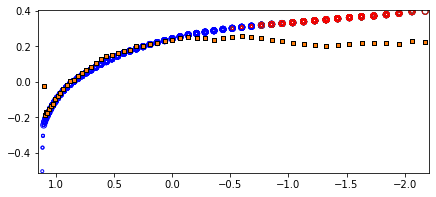

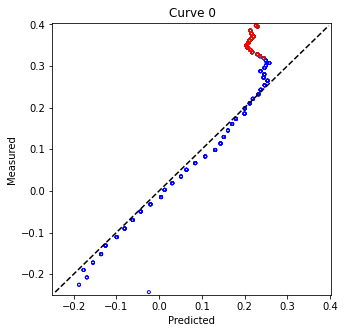

In [64]:
    wide_conv_window_t.train_df = ttt_1.iloc[2]['tr']
    wide_conv_window_t.val_df = ttt_1.iloc[2]['va']
    wide_conv_window_t.test_df = ttt_1.iloc[2]['te']

    wide_conv_window_t.plot_xy(conv_model,  n_batch=20 )
    plt.gca().set_title('Curve 0')

Text(0.5, 1.0, 'Curve 0')

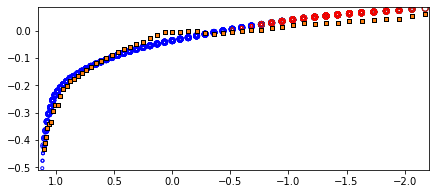

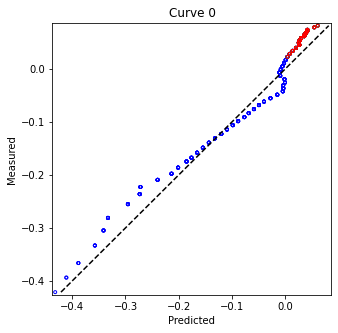

In [65]:
    wide_conv_window_t.train_df = ttt_2.iloc[2]['tr']
    wide_conv_window_t.val_df = ttt_2.iloc[2]['va']
    wide_conv_window_t.test_df = ttt_2.iloc[2]['te']

    wide_conv_window_t.plot_xy(conv_model,  n_batch=20 )
    plt.gca().set_title('Curve 0')

Text(0.5, 1.0, 'Curve 0')

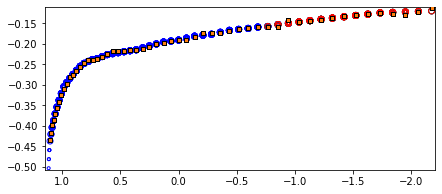

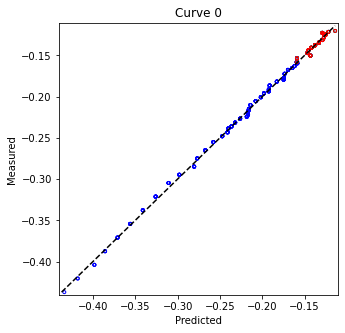

In [66]:
    wide_conv_window_t.train_df = ttt_3.iloc[2]['tr']
    wide_conv_window_t.val_df = ttt_3.iloc[2]['va']
    wide_conv_window_t.test_df = ttt_3.iloc[2]['te']

    wide_conv_window_t.plot_xy(conv_model,  n_batch=20 )
    plt.gca().set_title('Curve 0')

Text(0.5, 1.0, 'Curve 0')

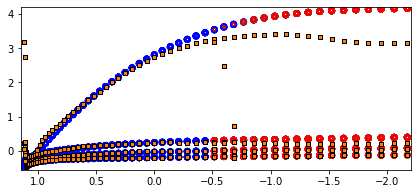

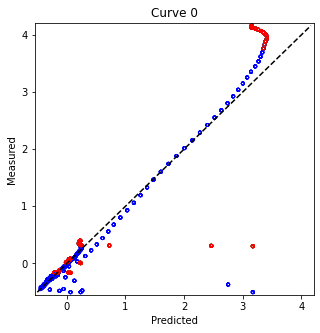

In [67]:
    wide_conv_window_t.train_df = tr3
    wide_conv_window_t.val_df = va3
    wide_conv_window_t.test_df = te3

    wide_conv_window_t.plot_xy(conv_model,  n_batch=20 )
    plt.gca().set_title('Curve 0')

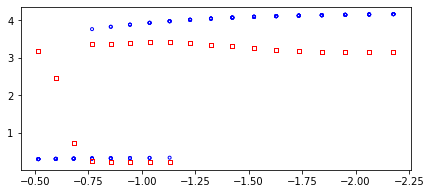

In [68]:
wide_conv_window_t.plot_batch(conv_model, dset_name='test', n_batch =0)

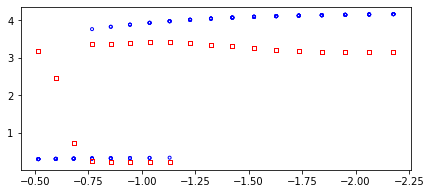

In [69]:
wide_conv_window_t.plot_batch(conv_model, dset_name='val', n_batch =0)


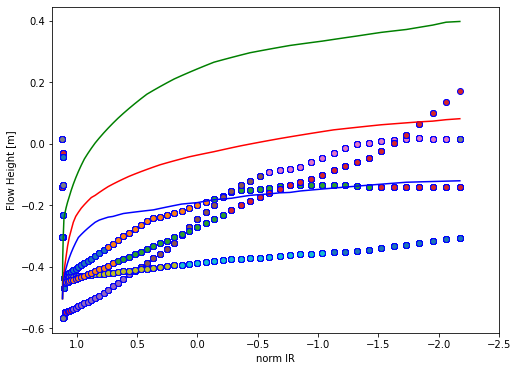

In [59]:
# curve 4
crv_4 = curve_4.copy()

m = len(crv_4)

#train_df_4 = crv_4[0:int(m*0.5)]
#train_df_4 = crv_4[0:int(m*0.25)]
#val_df_4 = crv_4[0:int(m*0.25)]

#train_df_4 = crv_4[ :int(m*1.00)]
train_df_4 = crv_4[ :int(m*1.00)]

#train_df_4 = crv_4[int(m*0.25):int(m*0.5)]
val_df_4 = train_df_4

wide_conv_window_t.train_df = train_df_4
wide_conv_window_t.val_df = val_df_4
wide_conv_window_t.test_df = val_df_4

#wide_conv_window_t.plot_xy(conv_model,  n_batch=20 )
#plt.gca().set_title('Curve4')


dataset = wide_conv_window_t.train

fig, ax2 = plt.subplots()

for i, batch in enumerate(dataset) :
  inputs, targets, lab = batch
  predictions = conv_model(inputs)
#  print(f'Inputs shape (batch, time, features): {inputs.shape}')
#  print(f'Labels shape (batch, time, features): {targets.shape}')
 # ax2.scatter(lab[:,:,0], targets[:,:,0])
#  ax2.scatter(lab[:,:,0], predictions[:,:,0], marker='o', facecolors='none'
  ax2.scatter(lab[:,:,0], predictions[:,:,0], marker='o'
              , edgecolor ='b')


ax2.set_xlabel('norm IR')
ax2.set_ylabel('Flow Height [m]')
#ax2.set_xlim([plt.xlim()[1], -2.5])
ax2.set_xlim([1.2, -2.5])

ax2.plot(curve_1.iloc[0:58,0], curve_1.iloc[0:58,1], 'g-',
        curve_2.iloc[0:58,0], curve_2.iloc[0:58,1], 'r-',
        curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b-',)
#         curve_0.iloc[0:58,0], curve_0.iloc[0:58,1], 'm-')

wide_conv_window_t.train_df = ttt_3.iloc[2]['tr']
    #.append(ttt_3.iloc[2]['va'])
                        #    .append(ttt_3.iloc[2]['te'])

In [75]:
a =ttt_3.iloc[2]['tr']
b=a.append(ttt_3.iloc[2]['va'])
c = b.append(ttt_3.iloc[2]['te'])
wide_conv_window_t.train_df = c

In [77]:
dataset = wide_conv_window_t.train

for i, batch in enumerate(dataset) :
  inputs, targets, lab = batch
  predictions = conv_model(inputs)
  ax2.scatter(lab[:,:,0], predictions[:,:,0], marker='o', edgecolor ='b')




### 순환 신경망

Recurrent Neural Network(RNN)는 시계열 데이터에 적합한 신경망 유형입니다. RNN은 시계열을 단계별로 처리하여 타임스텝 사이에서 내부 상태를 유지합니다.

자세한 내용은 [텍스트 생성 튜토리얼](https://www.tensorflow.org/tutorials/text/text_generation) 또는 [RNN 가이드](https://www.tensorflow.org/guide/keras/rnn)를 읽어보세요.

이 튜토리얼에서는 [Long Short Term Memory](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/LSTM)(LSTM)이라는 RNN 레이어를 사용합니다.

모든 keras RNN 레이어에 대한 중요한 생성자 인수는 `return_sequences` 인수입니다. 이 설정은 다음 두 가지 방법 중 하나로 레이어를 구성할 수 있습니다.

1. 기본값인 `False`인 경우 레이어는 최종 타임스텝의 출력만 반환하여 단일 예측을 수행하기 전에 모델이 내부 상태를 준비할 시간을 줍니다.

![An lstm warming up and making a single prediction](https://www.tensorflow.org/tutorials/structured_data/images/lstm_1_window.png)

1. `True`이면 레이어가 각 입력에 대한 출력을 반환합니다. 다음과 같은 경우에 유용합니다.

- RNN 레이어 쌓기
- 여러 타임스텝에서 동시에 모델 훈련

![An lstm making a prediction after every timestep](https://www.tensorflow.org/tutorials/structured_data/images/lstm_many_window.png)

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(16, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

`return_sequences=True`이면 모델을 한 번에 24시간 분량 데이터에 대해 훈련할 수 있습니다.

Note: This will give a pessimistic view of the model's performance. On the first timestep the model has no access to previous steps, and so can't do any better than the simple linear and dense models shown earlier.

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

In [ ]:
hist2 = compile.compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)
IPython.display.clear_output()

In [ ]:
eval(hist2)

In [ ]:
wide_window.plot(lstm_model)

In [ ]:
wide_window_t.plot_batch(lstm_model,n_batch =5)

### 성능

이 데이터세트를 사용하면 일반적으로 각 모델의 성능이 이전 모델보다 약간 더 좋습니다.

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [FlowHt, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

##### 다중 출력 모델 -skipped


### Advanced: Residual connections

The Baseline model from earlier took advantage of the fact that the sequence doesn't change drastically from time step to time step. Every model trained in this tutorial so far was randomly initialized, and then had to learn that the output is a a small change from the previous time step.

While you can get around this issue with careful initialization, it's simpler to build this into the model structure.

It's common in time series analysis to build models that instead of predicting the next value, predict how the value will change in the next timestep. Similarly, "Residual networks" or "ResNets" in deep learning refer to architectures where each layer adds to the model's accumulating result.

That is how you take advantage of the knowledge that the change should be small.

![A model with a residual connection](https://www.tensorflow.org/tutorials/structured_data/images/residual.png)

Essentially this initializes the model to match the Baseline. For this task it helps models converge faster, with slightly better performance.

This approach can be used in conjunction with any model discussed in this tutorial.

Here it is being applied to the LSTM model, note the use of the tf.initializers.zeros to ensure that the initial predicted changes are small, and don't overpower the residual connection. There are no symmetry-breaking concerns for the gradients here, since the zeros are only used on the last layer.

In [ ]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each timestep is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [ ]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(16, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small
        # So initialize the output layer with zeros
        kernel_initializer=tf.initializers.zeros)
]))

his = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()


In [ ]:
eval(his)

#### 성능

다음은 이러한 다중 출력 모델의 전반적인 성능입니다.

In [ ]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

위의 성능은 모든 모델 출력에 대한 평균입니다.

## Multi-step models
- Baseline
- Single-shot models
- Advanced tutoregressive model
- performance

In [ ]:
OUT_STEPS = 8
multi_window = WindowGenerator(input_width=8,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)
multi_window.plot()
multi_window


In [ ]:
multi_window_t = WinGen(input_width=8,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)
multi_window_t

### Baselines

A simple baseline for this task is to repeat the last input time step for the required number of output timesteps:

![Repeat the last input, for each output step](https://www.tensorflow.org/tutorials/structured_data/images/multistep_last.png)

In [ ]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])
    # tile the last time step of a batch for the future OUT_STEPS

last_baseline = MultiStepLastBaseline()
#last_baseline.compile(loss=tf.losses.MeanSquaredError(),
#                      metrics=[tf.metrics.MeanAbsoluteError()])
history = compile_and_fit(last_baseline, multi_window)


multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.val, verbose=0)
multi_window.plot(last_baseline)

IPython.display.clear_output()


Since this task is to predict 24h given 24h another simple approach is to repeat the previous day, assuming tomorrow will be similar:
![Repeat the previous day](https://www.tensorflow.org/tutorials/structured_data/images/multistep_repeat.png)

In [ ]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
#repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
#                        metrics=[tf.metrics.MeanAbsoluteError()])

history = compile_and_fit(repeat_baseline, multi_window)


multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

IPython.display.clear_output()

In [ ]:
eval(history)

### Single-shot models

One high level approach to this problem is use a "single-shot" model, where the model makes the entire sequence prediction in a single step.

This can be implemented efficiently as a `layers.Dense` with `OUT_STEPS*features` output units.
The model just needs to reshape that output to the required `(OUTPUT_STEPS, features)`.

#### Linear

A simple linear model based on the last input time step does better than either baseline,
but is underpowered. The model needs to predict `OUTPUT_STEPS` time steps, from a single
input time step with a linear projection. It can only capture a low-dimensional slice of the behavior, likely based mainly on the time of day and time of year.

![Predct all timesteps from the last time-step](https://www.tensorflow.org/tutorials/structured_data/images/multistep_dense.png)

In [ ]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

In [ ]:
eval(history)


#### Dense

Adding a `layers.Dense` between the input and output gives the linear model more power,
but is still only based on a single input timestep.

In [ ]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)


In [ ]:
eval(history)

In [ ]:
multi_window_t.plot_batch(n_batch=1, model=multi_dense_model,dset_name='train' )

#### CNN

A convolutional model makes predictions based on a fixed-width history, which may lead to better performance than
the dense model since it can see how things are changing over time:

![A convolutional model sees how things change over time](https://www.tensorflow.org/tutorials/structured_data/images/multistep_conv.png)

In [ ]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

In [ ]:
eval(history)

In [ ]:
multi_window_t.plot_batch(model=multi_conv_model, dset_name='train', n_batch=5, )


#### RNN

A recurrent model can learn to use a long history of inputs, if it's relevant to the predictions the model is making. Here the model will accumulate internal state for 24h, before making a single prediction for the next 24h.

In this single-shot format, the LSTM only needs to produce an output at the last time step,
so set `return_sequences=False`.

![The lstm accumulates state over the input window, and makes a single prediction for the next 24h](https://www.tensorflow.org/tutorials/structured_data/images/multistep_lstm.png)


In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

In [ ]:
eval(history)

In [ ]:
multi_window_t.plot_batch(model=multi_lstm_model, n_batch=4, )

In [ ]:
multi_window_t.plot_batch(model=multi_lstm_model,dset_name='val', n_batch=10, )

### Advanced: Autoregressive model

The above models all predict the entire output sequence in a single step.

In some cases it may be helpful for the model to decompose this prediction into individual time steps. Then each model's output can be fed back into itself at each step and predictions can be made conditioned on the previous one, like in the classic Generating Sequences With Recurrent Neural Networks.

One clear advantage to this style of model is that it can be set up to produce output with a varying length.

You could take any of the single-step multi-output models trained in the first half of this tutorial and run in an autoregressive feedback loop, but here you'll focus on building a model that's been explicitly trained to do that.

![Feedback a model's output to its input](https://www.tensorflow.org/tutorials/structured_data/images/multistep_autoregressive.png)


#### RNN
This tutorial only builds an autoregressive RNN model, but this pattern could be applied to any model that was designed to output a single timestep.

The model will have the same basic form as the single-step LSTM models: An LSTM followed by a layers.Dense that converts the LSTM outputs to model predictions.

A layers.LSTM is a layers.LSTMCell wrapped in the higher level layers.RNN that manages the state and sequence results for you (See Keras RNNs for details).

In this case the model has to manually manage the inputs for each step so it uses layers.LSTMCell directly for the lower level, single time step interface.


이 튜토리얼에서는 자기 회귀 RNN 모델만 빌드하지만 이 패턴은 단일 타임스텝을 출력하도록 설계된 모든 모델에 적용할 수 있습니다.

이 모델은 단일 스텝 `LSTM` 모델과 기본 형태가 동일하여 `LSTM` 다음에 `LSTM` 출력을 모델 예측으로 변환하는 `layers.Dense`가 이어집니다.

`layers.LSTM`은 상태와 시퀀스 결과를 자동으로 관리하는 더 높은 수준의 `layers.RNN`에서 래핑된 `layers.LSTMCell`입니다(자세한 내용은 [Keras RNN](https://www.tensorflow.org/guide/keras/rnn) 참조).

이 경우 모델은 각 스텝에 대한 입력을 수동으로 관리해야 하므로 더 낮은 수준의 단일 타임스텝 인터페이스에 대해 `layers.LSTMCell`를 직접 사용합니다.

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

이 모델에 필요한 첫 번째 메서드는 입력을 기반으로 내부 상태를 초기화하는 `warmup` 메서드입니다. 일단 훈련되면 이 상태는 입력 기록의 관련 부분을 캡처합니다. 이는 앞서 알아본 단일 스텝 `LSTM` 모델과 동일합니다.

In [ ]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

이 메서드는 단일 타임스텝 예측과 LSTM의 내부 상태를 반환합니다.

In [ ]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

`RNN`의 상태 및 초기 예측을 사용하여 이제 이전의 각 스텝에서 수행한 예측을 입력으로 제공하여 모델을 계속 반복할 수 있습니다.

출력 예측을 수집하는 가장 간단한 방법은 Python 목록을 사용하고 루프 후에 `tf.stack`을 사용하는 것입니다.

참고: 이와 같이 Python 목록을 쌓는 것은 훈련을 위해 `Model.compile(..., run_eagerly=True)`를 사용하거나 고정 길이의 출력을 통해 즉시 실행하는 경우에만 효과가 있습니다. 동적 출력 길이의 경우 Python 목록 대신 `tf.TensorArray`를 사용하고 Python `range` 대신 `tf.range`를 사용해야 합니다.

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

예제 입력에서 이 모델을 테스트 실행합니다.

In [ ]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

이제 모델을 훈련합니다.

In [ ]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

### 성능

이 문제에 대해 모델 복잡성이 증가함에 따라 분명히 이득이 감소합니다.

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

이 튜토리얼의 전반부에서 소개한 다중 출력 모델에 대한 메트릭은 모든 출력 특성에 평균화된 성능을 보여줍니다. 이러한 성능은 유사하지만 출력 타임스텝에서도 평균화됩니다. 

In [ ]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

밀집 모델에서 컨볼루션 및 반복 모델로 이동하여 얻은 이득은 몇 퍼센트(있다고 하더라도)에 불과하며 자기 회귀 모델의 성능은 분명히 더 나빴습니다. 따라서 이러한 더 복잡한 접근 방법은 **이** 문제에서는 가치가 없을 수도 있지만 시도해 보기 전에는 알 수 있는 방법이 없었으며 이러한 모델은 **다른 특정** 문제에 도움이 될 수 있습니다.

## 다음 단계

이 튜토리얼에서는 TensorFlow를 사용한 시계열 예측에 대해 간단히 소개했습니다.

- 자세한 내용은 다음을 참조하세요.
    - [Scikit-Learn, Keras 및 TensorFlow를 이용한 머시러닝 실무](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)(2차 개정 버전), 챕터 15
    - [Python을 이용한 딥러닝](https://www.manning.com/books/deep-learning-with-python) 챕터 6
    - [Udacity의 딥러닝 TensorFlow 개론](https://www.udacity.com/course/intro-to-tensorflow-for-deep-learning--ud187) 레슨 8 및 [연습 노트북](https://github.com/tensorflow/examples/tree/master/courses/udacity_intro_to_tensorflow_for_deep_learning)
- 또한 TensorFlow에서 [기존의 시계열 모델](https://otexts.com/fpp2/index.html)은 모두 구현할 수 있다는 점을 기억하세요. 이 튜토리얼에서는 TensdorFlow의 내장 기능에 초점을 맞추었습니다.